# Lab 4: Standardized random variables, gamma distribution, ECDF

Jie Wang

3200112404

03/12/2024

As usual, the first code cell below imports the packages we'll be using for this lab.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import scipy as sp
import scipy.stats as st
import pickle as pkl
print ("Modules Imported!")

Modules Imported!


Labs 1 and 3 go over most of the python that will be necessary for any of the labs, so there will be no more Python tutorial sections.  As you've probably noticed in previous labs, some questions may require more than just code. You can create new cells and designate their type as markdown in order to do this. I would suggest learning the basics of LaTex so that you can more easily represent your mathematical thought process. You can use LaTex syntax by placing it between two dollar signs in a markdown cell.

## Standardized Random Variables:

A standard random variable is one that has a mean of zero and a variance of one $(\mu=0, \sigma^2=1)$.  

If a random variable $Y$ is not standard, then a standard one can be derived from it
by centering and linear rescaling.   

The distribution (e.g. pmf) of the standardized version of $Y$ has the same shape as the distribution of $Y$.    

We require two things of the standarized version: a mean of zero and a variance of one. If we let $X$ be the standardized form of $Y$ then $X = \frac{Y-\mu_Y}{\sigma_Y},$ where $\mu_Y$ is the mean of $Y$ and $\sigma_Y^2$ is the variance of $Y.$ 

Let's check this:
$$

\begin{align*}
E[X] & = E\left[\frac{Y-\mu_Y}{\sigma_Y}\right] = \frac{1}{\sigma_y}E[Y-\mu_Y] = \frac{1}{\sigma_Y}(E[Y]-\mu_Y) = 0  \\
\text{Var}(X) & = \text{Var}\left(\frac{Y-\mu_Y}{\sigma_Y}\right) = \frac{1}{\sigma_Y^2}\text{Var}(Y-\mu_Y) = \frac{\text{Var}(Y)}{\sigma_Y^2} = 1
\end{align*}

$$

So to standardize any random variable, we simply need to subtract the mean and then divide by the standard deviation. This is useful because if we know the CDF of a standardized version of a random variable we can find the CDF of the original version. For example, suppose $Y$ is a non-standard variable and $X$ is the standardized version of Y, and suppose we want to determine the CDF of Y but only have the CDF of X. We can determine the CDF by the following:

$F_Y(c) = P\{Y \le c\} = P\{Y-\mu_Y \le c-\mu_y\} = P\left\{\frac{Y-\mu_Y}{\sigma_Y} \le \frac{c-\mu_Y}{\sigma_Y}\right\}= P\left\{X \le \frac{c-\mu_Y}{\sigma_Y}\right\}$

Since Python does such a nice job of packaging these distributions, this isn't particularly necessary for our coding purposes. However, when you get to Gaussian distributions in your probability class, you will use this extensively.

$\textbf{Caveat}$: When you do problem 1, be aware of a machine-dependent feature of the .pmf method of a distribution object created by st.rv_discrete, which has caused bugs and confusion for many students before (especially in part 3). The .pmf behaves weirdly for non-integer values, illustrated this example: 

In [3]:
c = [1.5, 2.0]
p = [0.5, 0.5]
Z = st.rv_discrete(values=(c,p))
print (Z.pmf(2.0))  # Prints 0.5
print (Z.pmf(1.5))  # Prints 0.5 on some machines, Prints 0.0 on some other machines (e.g. your laptops)

0.5
0.5


This seems to be a design flaw of the scipy library. You are not required to understand it or fix it. Our suggestion is: please avoid using the .pmf method for non-integer values. -- Zeyu Zhou, Feb 2018

## Problem 1:  To illustrate the standardization procedure, 

For a standard six sided die, imagine a scenario that rolling a number that is equal or bigger than 5 is considered a success. 

P = CARD(5,6) / {6} = 1/3

Otherwise it is considered as a failure. 

You roll the dice 10 times.

Create a variable $Y$ that represents the number of successes you achieve in these 10 rounds. 

Print out the mean and variance of $Y$.     

Create another random variable $X$, which is a standardized version of $Y$. Print out the mean and variance of $X$

Plot the pmf of $Y$ and the pmf of $X.$   

Up to centering and linear scaling, the pmfs should have the same shape. 


In [5]:
dice = st.randint(low=1,high=7)
n = 10
p = 1/3

binom_dist = st.binom(n, p)

mean_Y = binom_dist.mean()
variance_Y = binom_dist.var()

mean_Y, variance_Y

(3.333333333333333, 2.2222222222222223)

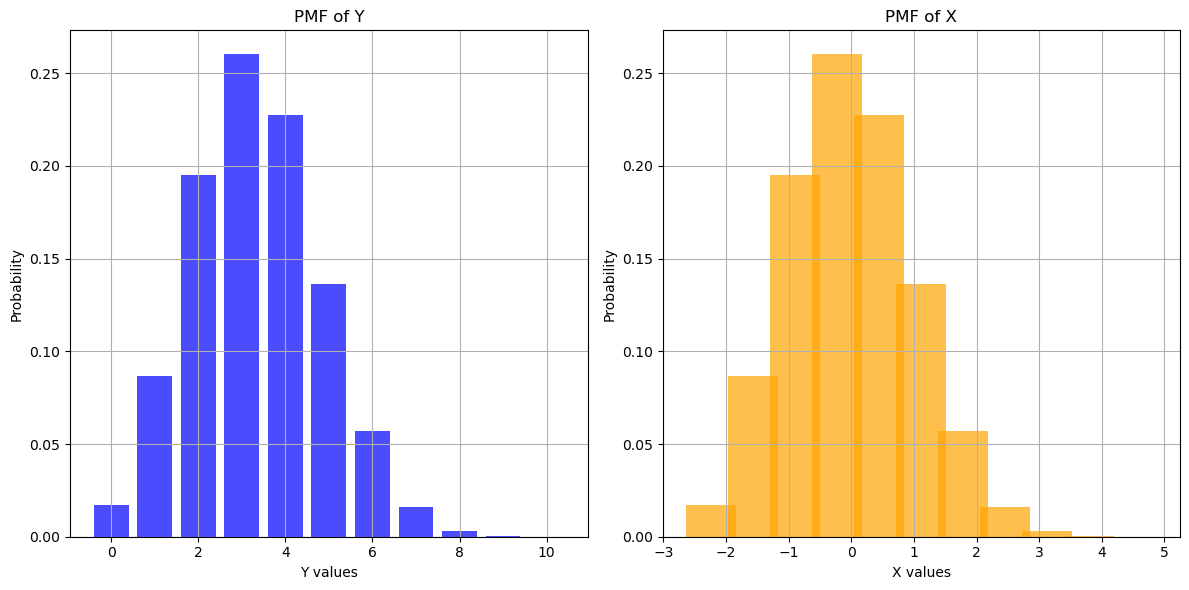

mean_X, variance_X is (1.1180339887498951, 4.5)


In [7]:

std_dev_Y = np.sqrt(variance_Y)

# Define the standardized variable X
# Since X is derived from Y, we need to apply the standardization formula to each value in the support of Y
# and then plot the PMF using these transformed values

y_values = np.arange(0, n+1)

pmf_Y = binom_dist.pmf(y_values)

x_values = (y_values - mean_Y) / std_dev_Y

# PMF of X (same as Y, as only the values change, but probabilities remain the same)
pmf_X = pmf_Y  
plt.figure(figsize=(12, 6))

# PMF of Y
plt.subplot(1, 2, 1)
plt.bar(y_values, pmf_Y, color='blue', alpha=0.7, label='PMF of Y')
plt.title("PMF of Y")
plt.xlabel("Y values")
plt.ylabel("Probability")
plt.grid(True)

# PMF of X
plt.subplot(1, 2, 2)
plt.bar(x_values, pmf_X, color='orange', alpha=0.7, label='PMF of X')
plt.title("PMF of X")
plt.xlabel("X values")
plt.ylabel("Probability")
plt.grid(True)

plt.tight_layout()
plt.show()

mean_X = np.mean(x_values)
variance_X = np.var(x_values)


print(f'mean_X, variance_X is {mean_X, variance_X}')

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 1</SPAN>**

## Continuous Distribution:

### Gamma Distribution

As we discussed in ECE313 classes, we introduced some standard continuous probability distribution: Uniform Distribution, Exponential Distribution, Normal distribution. Here, we are going to introduce more continuous probability distribution.

The Gamma distribution is a particular case of the normal distribution, which describes many life events including predicted rainfall, the reliability of mechanical tools and machines, or any applications that only have positive results. Unfortunately, these applications are often unbalanced, which explains the Gamma distribution’s skewed shape. At its core, the Gamma distribution is used to describe the time until an event occurs, given a certain rate at which events happen. It is characterized by two parameters: the shape parameter $k$ (also known as $\alpha$), and the rate parameter $\theta$ (also known as $\beta$). In each of these forms, both parameters are positive real numbers. 

The shape parameter $k$ describes how many events the distribution describes. For example, if we use the Gamma distribution to describe the probability of car accidents in a particular city by modeling four accidents, the shape parameter will be four. The scale parameters $\theta$ describe the time interval between the events we are modeling. If we use the car accidents example again, we want to measure the time between the four accidents, so we’ll use the average time between those accidents. The scale parameter controls the height of the distribution’s peak. The higher the value of the scale distribution, the more spread it will be, which means it will have a lower peak. However, if the scale parameter is small, the distribution will contract and the peak will be larger.
## Problem 2: Complete the following problem related to Gamma Distribution. 
Given the following sets of parameters for the Gamma distribution, plot the probability density function (PDF) for each set on the same graph for comparison: 

    1.$k$=1.0, $\theta$=2.0 
    2.$k$=2.0, $\theta$=2.0  
    3.$k$=3.0, $\theta$=2.0   
    4.$k$=5.0, $\theta$=1.0   
    5.$k$=9.0, $\theta$=0.5 
    6.$k$=7.5, $\theta$=1.0  
    7.$k$=0.5, $\theta$=1.0 
    
    Use a range for $x$ from 0 to 20. Label your axes appropriately and include a legend to differentiate between the plots for each set of parameters. 
For the same sets of parameters provided in Question 2.1, plot the cumulative distribution function (CDF) for each set on the same graph for comparison. 
What do you find in this comparison? Give a brief description after plotting.  

PDF

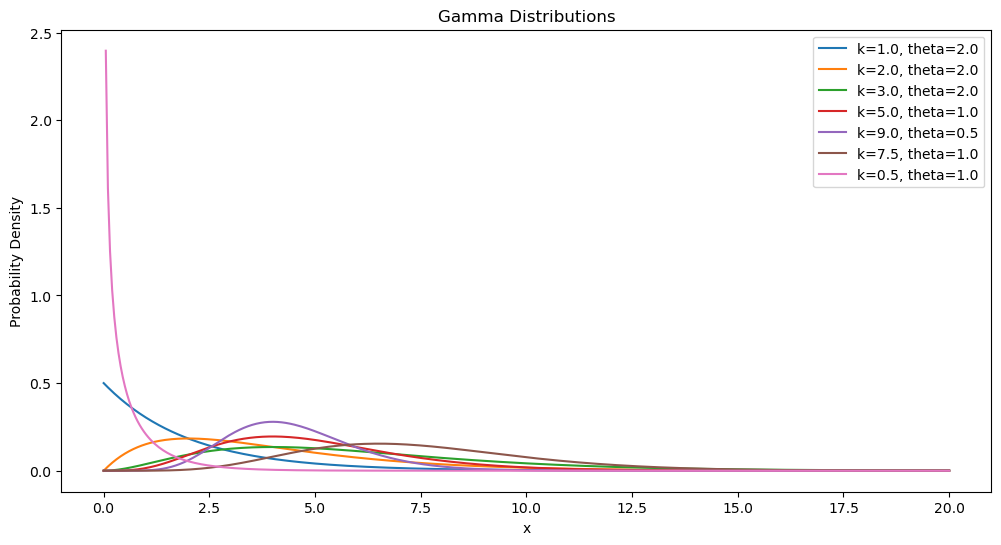

In [12]:
k = [1.,2.,3.,5.,9.,7.5,0.5]
theta = [2.,2.,2.,1.,0.5,1.,1.]

parameter_dict = {k_val: theta_val for k_val, theta_val in zip(k, theta)}

x = np.linspace(0, 20, 400)


plt.figure(figsize=(12,6))

for k_val, theta_val in parameter_dict.items():
    y_pdf = st.gamma.pdf(x, a=k_val, scale=theta_val)
    plt.plot(x, y_pdf, label=f'k={k_val}, theta={theta_val}')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Gamma Distributions of PDF')
plt.legend()
plt.show()

CDF

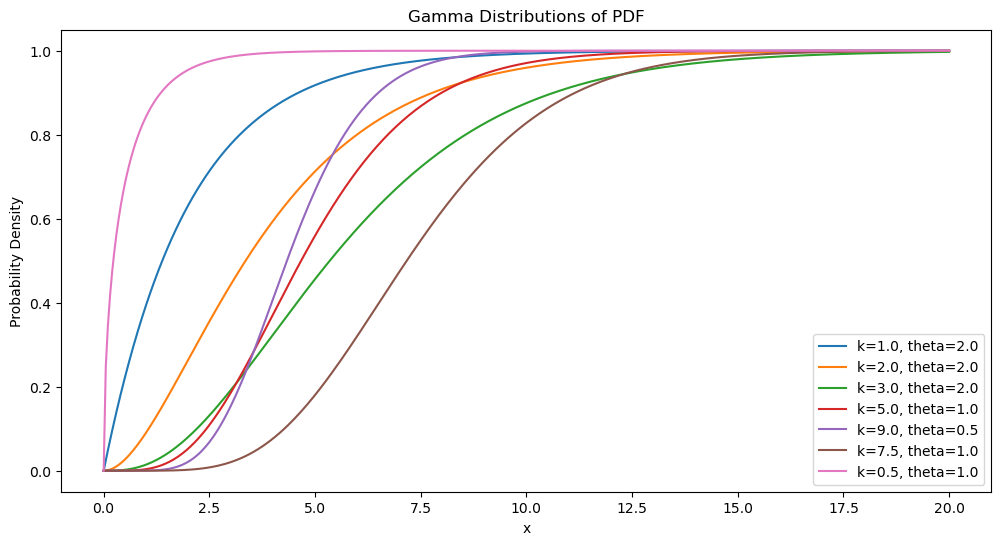

In [13]:

plt.figure(figsize=(12,6))

for k_val, theta_val in parameter_dict.items():
    y_pdf = st.gamma.cdf(x, a=k_val, scale=theta_val)
    plt.plot(x, y_pdf, label=f'k={k_val}, theta={theta_val}')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Gamma Distributions of PDF')
plt.legend()
plt.show()

__Answer:__ 

### Observations from the Comparisons:

1. **PDFs**:
   - The PDFs demonstrate how the shape and scale parameters influence the distribution's shape. 
   - Lower values of $ k $ (shape parameter) result in distributions skewed towards the right, indicating a higher probability of smaller values.
   - As $ k $ increases, the peak of the distribution shifts rightward and the distribution becomes more symmetric, resembling the Normal distribution for larger $ k $.
   - The scale parameter $ \theta $ affects the spread of the distribution. Smaller $ \theta $ results in a more peaked distribution (e.g., $ k=9.0, \theta=0.5 $), while larger $ \theta $ spreads the distribution out (e.g., $ k=1.0, \theta=2.0 $).

2. **CDFs**:
   - The CDFs show the cumulative probability for the variable being less than or equal to a specific value.
   - Distributions with a smaller shape parameter $ k $ (e.g., $ k=0.5 $) accumulate probability more quickly at the lower end of the scale.
   - Distributions with larger $ k $ values accumulate probability more evenly across the range and approach 1 (certainty) more gradually.

In summary, the shape and scale parameters significantly impact the behavior of the Gamma distribution, influencing its spread, peak, and skewness, as seen in the PDFs, and the rate at which probability accumulates, as seen in the CDFs.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 2</SPAN>**

### Normal Distribution and ECDF

The Normal distribution, also known as the Gaussian distribution, is one of the most important and widely used probability distributions in statistics. It is characterized by its bell-shaped curve, symmetric around its mean, $\mu$, and with its spread determined by the standard deviation, $\sigma$. The Normal distribution is used to model a wide range of natural phenomena, from heights and weights in a population to measurement errors in experiments. It is defined by the probability density function (PDF): 
\begin{align*}
f(x | \mu, \sigma^2) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
\end{align*}

The Empirical Cumulative Distribution Function (ECDF) is a tool used in statistics to estimate the cumulative distribution function (CDF) of a random variable. Unlike the CDF, which is theoretical and known for distributions like the Normal distribution, the ECDF is constructed from data and provides a step-wise approximation of the CDF. The Empirical Cumulative Distribution Function (ECDF), $F_n(x)$, for a given sample of size $n$ is defined as: 
\begin{align*}
F_n(x) = \frac{1}{n} \sum_{i=1}^{n} I(x_i \leq x)
\end{align*}
where $n$ is the number of data points, $x_i$ are the observed values, and $I$ is an indicator function that is 1 if $x_i$ ≤ $x$ and 0 otherwise. The ECDF gives the proportion of observations less than or equal to $x$. 

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 3:</SPAN>** 

Consider a Normal distribution $N(\mu, \sigma^2)$ where $\mu$ is the mean and $\sigma^2$ is the variance. For this question, you will be working with a specific Normal distribution where $\mu$ = 0 and $\sigma$ = 6.  

Using the normal distribution $N(\mu, \sigma^2)$, generate three separate samples of sizes 10, 100, and 1000 random numbers.

For each sample, calculate and plot the ECDF. Ensure that each ECDF plot is clearly labeled and includes a legend indicating the sample size.

Discuss how the ECDF changes with increasing sample size and what this implies about the convergence of the empirical distribution to the theoretical distribution.

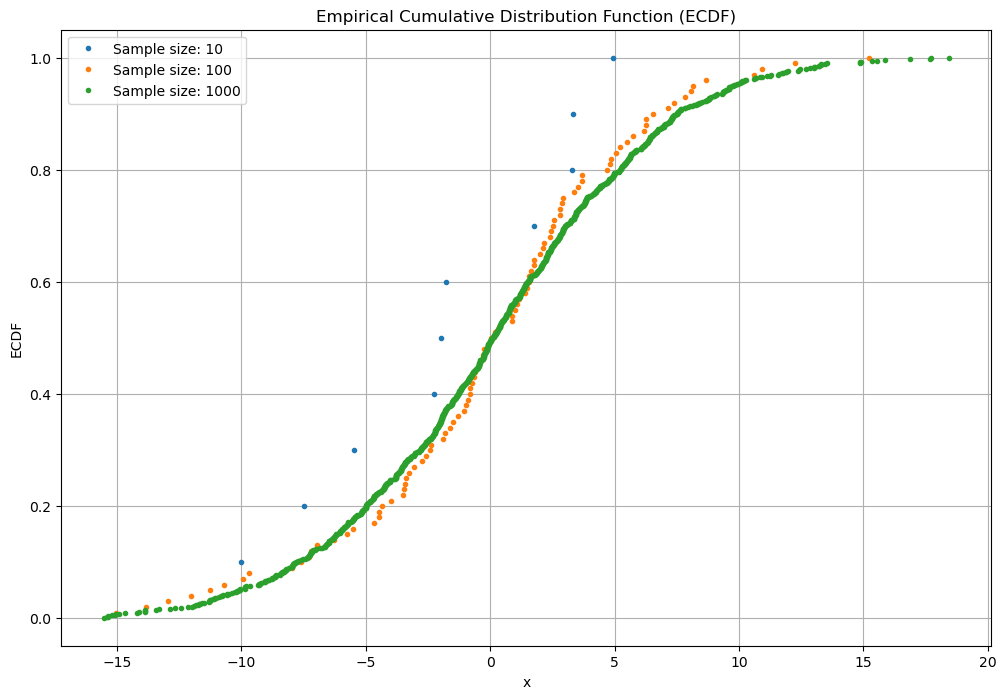

In [15]:
mu = 0  
sigma = 6  

# Sample sizes
sizes = [10, 100, 1000]

samples = {size: st.norm.rvs(loc=mu, scale=sigma, size=size) for size in sizes}


# Function to calculate ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

plt.figure(figsize=(12, 8))
for size, sample in samples.items():
    x, y = ecdf(sample)
    plt.plot(x, y, marker='.', linestyle='none', label=f'Sample size: {size}')

plt.title('Empirical Cumulative Distribution Function (ECDF)')
plt.xlabel('x')
plt.ylabel('ECDF')
plt.legend()
plt.grid(True)
plt.show()


__Answer:__ 
The plot above shows the Empirical Cumulative Distribution Function (ECDF) for each of the three samples with sizes 10, 100, and 1000.

### Discussion on the ECDF and Sample Size:

1. **Convergence with Increasing Sample Size**:
   - As the sample size increases, the ECDF starts to converge more closely to the theoretical CDF of the Normal distribution. This is evident from the smoother curve and closer approximation to a continuous line as we move from a sample size of 10 to 1000.

2. **Implications**:
   - The larger the sample size, the more representative the sample is of the population, and thus, the empirical distribution (ECDF) becomes a better approximation of the theoretical distribution.
   - This phenomenon illustrates the Law of Large Numbers, which states that as a sample size grows, its mean gets closer to the average of the whole population. In this context, it implies the convergence of the ECDF towards the theoretical CDF as the sample size increases.

In summary, the plots illustrate how an increase in sample size leads to a more accurate representation of the underlying Normal distribution, highlighting the importance of large sample sizes in statistical analysis and inference.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 3</SPAN>**

## Lab Questions:

Make sure to complete all lab questions 1-3 for this weeks lab.

<div class="alert alert-block alert-warning"> 
## Academic Integrity Statement ##

By submitting the lab with this statement, you declare you have written up the lab entirely by yourself, including both code and markdown cells. You also agree that you should not share your code with anyone else. Any violation of the academic integrity requirement may cause an academic integrity report to be filed that could go into your student record. See <a href="https://provost.illinois.edu/policies/policies/academic-integrity/students-quick-reference-guide-to-academic-integrity/">Students' Quick Reference Guide to Academic Integrity</a> for more information. 